2)The athletic director of State University is interested in developing a multiple regression model
that might be used to explain the variation in attendance at football games at his school. A
sample of 16 games was selected from home games played during the past 10 seasons. Data for
the following factors were determined:
<p>y = Game attendance</p>
<p>x1 = Team win/loss percentage to date</p>
<p>x2 = Opponent win/loss percentage to date</p>
<p>x3 = Games played this season</p>
<p>x4 = Temperature at game time</p>

The data collected are in the file called Football. Provide the regression analysis report for
athletic director of State University. Your report should explain and summarize the following:

a)Scatter plots for each independent variable versus the dependent variable. Based on the
scatter plots, produce a model that you believe represents the relationship between the
dependent variable and the group of predictor variables represented in the scatter plots.

b)Based on the correlation matrix developed from these data, comment on whether you
think a multiple regression model will be effectively developed from these data.

c)Use the sample data to estimate the multiple regression model that contains all four
independent variables.

In [78]:
import pandas as pd
import numpy as np
import scipy.stats as st 
import math as m

In [79]:
football = pd.read_excel('D://Business Statistic/MANB1123-master/MANB1123-master/Data_Set/Football.xlsx')
football.head()

Game Number  Game Attendance  Team Win/Loss Percentage  \
0            1            14502                      33.3   
1            2            12459                      25.0   
2            3            15600                      80.0   
3            4            16780                      75.0   
4            5            14600                      60.0   

   Opponent Win/Loss Percentage  Games Played  Temperature  
0                          80.0             6           47  
1                          50.0             4           56  
2                          66.6             5           55  
3                         100.0             8           60  
4                          80.0            10           55

In [80]:
n = football.shape[0] #total rows
n

16

In [81]:
football.shape[1] # total columns

6

In [82]:
football.columns #list of columns

Index(['Game Number', 'Game Attendance', 'Team Win/Loss Percentage',
       'Opponent Win/Loss Percentage', 'Games Played', 'Temperature'],
      dtype='object')

In [83]:
football.dtypes

Game Number                       int64
Game Attendance                   int64
Team Win/Loss Percentage        float64
Opponent Win/Loss Percentage    float64
Games Played                      int64
Temperature                       int64
dtype: object

a)Scatter plots for each independent variable versus the dependent variable. Based on the
scatter plots, produce a model that you believe represents the relationship between the
dependent variable and the group of predictor variables represented in the scatter plots.

In [84]:
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
plt.rcParams['figure.figsize'] = (8, 6)
plt.rcParams['font.size'] = 14

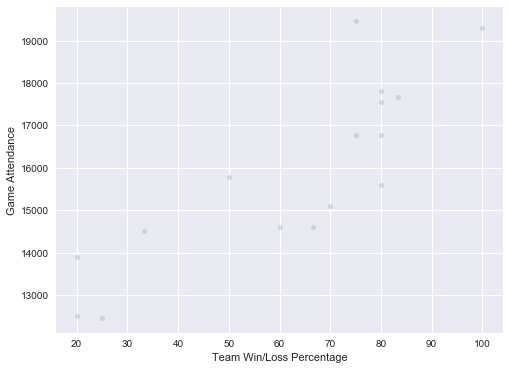

In [85]:
# Pandas scatter plot
football.plot(kind='scatter', x='Team Win/Loss Percentage', y='Game Attendance', alpha=0.2)

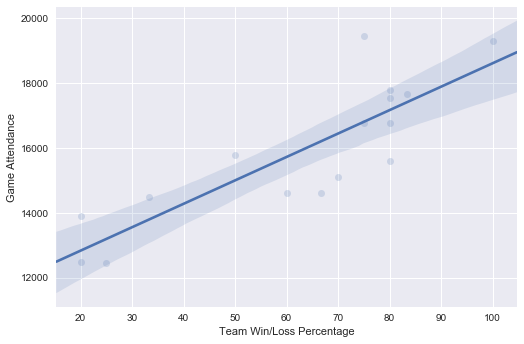

In [86]:
# Seaborn scatter plot with regression line
sns.lmplot(x='Team Win/Loss Percentage', y='Game Attendance', data=football, aspect=1.5, scatter_kws={'alpha':0.2})

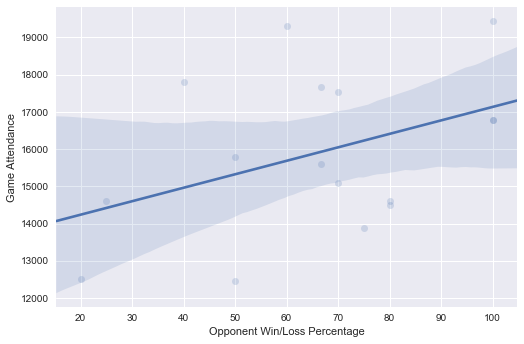

In [87]:
# Seaborn scatter plot with regression line
sns.lmplot(x='Opponent Win/Loss Percentage', y='Game Attendance', data=football, aspect=1.5, scatter_kws={'alpha':0.2})

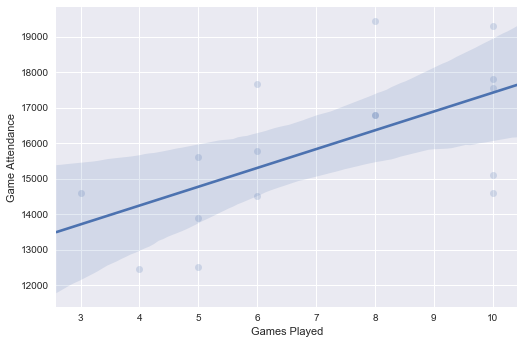

In [88]:
# Seaborn scatter plot with regression line
sns.lmplot(x='Games Played', y='Game Attendance', data=football, aspect=1.5, scatter_kws={'alpha':0.2})

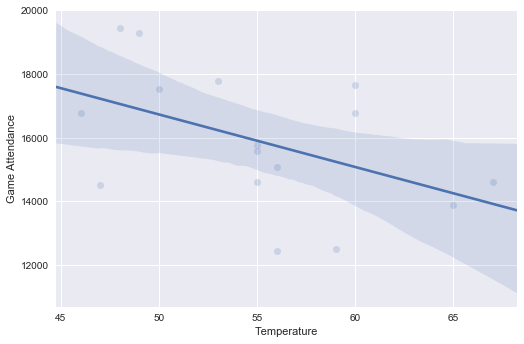

In [89]:
# Seaborn scatter plot with regression line
sns.lmplot(x='Temperature', y='Game Attendance', data=football, aspect=1.5, scatter_kws={'alpha':0.2})

In [90]:
x1 = football['Team Win/Loss Percentage']
list(x1)

[33.299999999999997,
 25.0,
 80.0,
 75.0,
 60.0,
 100.0,
 66.599999999999994,
 50.0,
 80.0,
 75.0,
 20.0,
 70.0,
 83.299999999999997,
 20.0,
 80.0,
 80.0]

In [91]:
x2 = football['Opponent Win/Loss Percentage']
list(x2)

[80.0,
 50.0,
 66.599999999999994,
 100.0,
 80.0,
 60.0,
 25.0,
 50.0,
 40.0,
 100.0,
 75.0,
 70.0,
 66.599999999999994,
 20.0,
 100.0,
 70.0]

In [92]:
x3 = football['Games Played']
list(x3)

[6, 4, 5, 8, 10, 10, 3, 6, 10, 8, 5, 10, 6, 5, 8, 10]

In [93]:
x4 = football['Temperature']
list(x4)

[47, 56, 55, 60, 55, 49, 67, 55, 53, 48, 65, 56, 60, 59, 46, 50]

In [94]:
y = football['Game Attendance']
list(y)

[14502,
 12459,
 15600,
 16780,
 14600,
 19300,
 14603,
 15789,
 17800,
 19450,
 13890,
 15097,
 17666,
 12500,
 16780,
 17543]

In [95]:
del football['Game Number'] #remove game number column

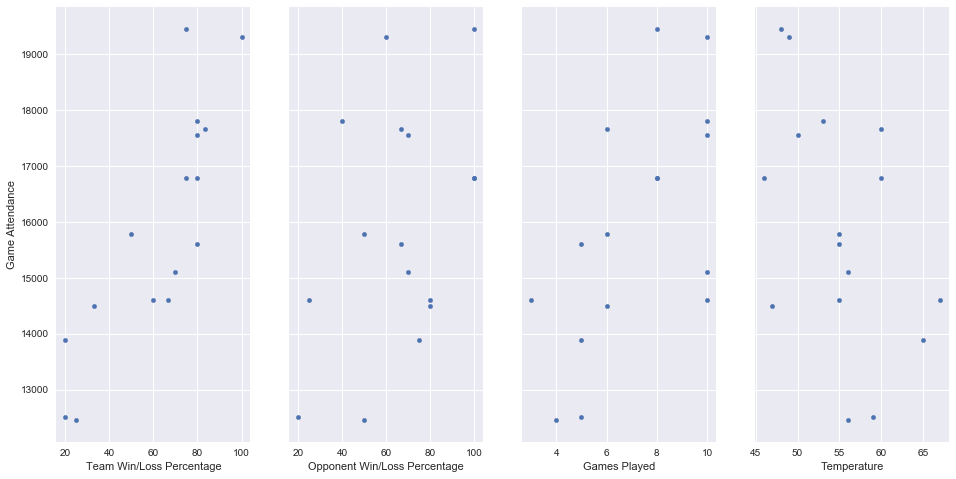

In [96]:
# visualize the relationship between the features and the response using scatterplots
fig, axs = plt.subplots(1, 4, sharey=True)
football.plot(kind='scatter', x='Team Win/Loss Percentage', y='Game Attendance', ax=axs[0], figsize=(16, 8))
football.plot(kind='scatter', x='Opponent Win/Loss Percentage', y='Game Attendance', ax=axs[1])
football.plot(kind='scatter', x='Games Played', y='Game Attendance', ax=axs[2])
football.plot(kind='scatter', x='Temperature', y='Game Attendance', ax=axs[3])

b) Based on the correlation matrix developed from these data, comment on whether you
think a multiple regression model will be effectively developed from these data.

In [97]:
football.corr()

Game Attendance  Team Win/Loss Percentage  \
Game Attendance                      1.000000                  0.848749   
Team Win/Loss Percentage             0.848749                  1.000000   
Opponent Win/Loss Percentage         0.414250                  0.286750   
Games Played                         0.599215                  0.577958   
Temperature                         -0.476186                 -0.330096   

                              Opponent Win/Loss Percentage  Games Played  \
Game Attendance                                   0.414250      0.599215   
Team Win/Loss Percentage                          0.286750      0.577958   
Opponent Win/Loss Percentage                      1.000000      0.403594   
Games Played                                      0.403594      1.000000   
Temperature                                      -0.446949     -0.550083   

                              Temperature  
Game Attendance                 -0.476186  
Team Win/Loss Percentage        -0.330096  
Opponent Win/Loss Percentage    -0.446949  
Games Played                    -0.550083  
Temperature                      1.000000

Based on the correlation matrix, it is clear that dependent variables( Game Attendance) are significantly correlatee to two independent variables (Team Win/Loss Percentage & Games Played). Team Win/Loss Percentage (**0.848749**) and Games Played (**0.599215**) are higher than 0.5 and closer to 1.0 than 0.0

c) Use the sample data to estimate the multiple regression model that contains all four
independent variables.

In [98]:
# this is the standard import if you're using "formula notation" (similar to R)
import statsmodels.formula.api as smf

In [99]:
# create a fitted model with all three features
lm = smf.ols(formula='y ~ x1 + x2 + x3 + x4', data=football).fit()

# print the coefficients
lm.params

Intercept    14122.240859
x1              63.153253
x2              10.095820
x3              31.506218
x4             -55.460906
dtype: float64

y^ = Beta0 + Beta1x1 + Beta2x2 + Beta3x3 + Beta4x4

**y^ = 14122 + 63.15x1 + 10.1x2 + 31.5x3 - 55.5x4**

In [100]:
# print a summary of the fitted model
lm.summary()

C:\Users\mkrijal\Anaconda3\lib\site-packages\scipy\stats\stats.py:1327: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=16
  "anyway, n=%i" % int(n))


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.775
Model:                            OLS   Adj. R-squared:                  0.694
Method:                 Least Squares   F-statistic:                     9.491
Date:                Sat, 29 Apr 2017   Prob (F-statistic):            0.00143
Time:                        20:07:57   Log-Likelihood:                -132.93
No. Observations:                  16   AIC:                             275.9
Df Residuals:                      11   BIC:                             279.7
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
Intercept   1.412e+04   4335.792      3.257      0.008      4579.228  2.37e+04
x1            63.1533     14.939      4.227      0.001        30.273    96.033
x2            10.0958     14.314      0.705      0.495       -21.409    41.601
x3            31.5062    177.130      0.178      0.862      -358.354   421.366
x4           -55.4609     62.094     -0.893      0.391      -192.128    81.206
==============================================================================
Omnibus:                        0.483   Durbin-Watson:                   1.776
Prob(Omnibus):                  0.785   Jarque-Bera (JB):                0.554
Skew:                           0.136   Prob(JB):                        0.758
Kurtosis:                       2.131   Cond. No.                     1.59e+03
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.59e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

d) What percentage of the total variation in the dependent variable is explained by the four
independent variables in the model?

R-squared = **77.5%**

Generally, the higher the R-squared, the better the model fits data

e) Test to determine whether the overall model is statistically significant. Use alpha= 0.05

**Ho: p = Beta0 = Beta1 = Beta2 = Beta3 = Beta4 = 0**

**Ha: p not equal to 0**

F-statististic = **9.491**, Prob(F-stat) = **0.00143**

P-value is small but not equal to 0 so we reject Ho

Since P-value is **0.00143** and less than alpha = **0.05**, the model is statiscally significant 



f) Which, if any, of the independent variables is statistically significant? Use a significance
level of alpha =0.08 and the p-value approach to conduct these tests.

In [101]:
lm.pvalues

Intercept    0.007638
x1           0.001418
x2           0.495280
x3           0.862058
x4           0.390883
dtype: float64

if alpha = 0.08, **Team Win/Loss Percentage (0.001)**  is the only independent variable that statiscally significant

g) Estimate the standard deviation of the model error and discuss whether this regression
model is acceptable as a means of predicting the football attendance at State University at
any given game.

In [102]:
from statsmodels.stats.anova import anova_lm

In [103]:
# Peform analysis of variance on fitted linear model
anova_results = anova_lm(lm)
anova_results

C:\Users\mkrijal\Anaconda3\lib\site-packages\scipy\stats\_distn_infrastructure.py:875: RuntimeWarning: invalid value encountered in greater
  return (self.a < x) & (x < self.b)
C:\Users\mkrijal\Anaconda3\lib\site-packages\scipy\stats\_distn_infrastructure.py:875: RuntimeWarning: invalid value encountered in less
  return (self.a < x) & (x < self.b)
C:\Users\mkrijal\Anaconda3\lib\site-packages\scipy\stats\_distn_infrastructure.py:1814: RuntimeWarning: invalid value encountered in less_equal
  cond2 = cond0 & (x <= self.a)


df        sum_sq       mean_sq          F    PR(>F)
x1         1.0  4.945640e+07  4.945640e+07  35.271798  0.000097
x2         1.0  2.184077e+06  2.184077e+06   1.557661  0.237921
x3         1.0  4.709864e+05  4.709864e+05   0.335903  0.573882
x4         1.0  1.118596e+06  1.118596e+06   0.797771  0.390883
Residual  11.0  1.542366e+07  1.402151e+06        NaN       NaN

In [104]:
mean_sq = 1.40215  #mean square of residual
se = m.sqrt(mean_sq)
se

1.1841241488965588

In [105]:
#following the rule of thumb +-2(Standard error)
attendance = 2 * se #prediction of any game
attendance

2.3682482977931176

Prediction of game attendance is around **+2368** or **-2368**

h) Develop a 95% confidence interval estimate for each of the regression coefficients and
interpret each estimate. Comment on whether the interpretation of the intercept is
relevant in this situation.

In [106]:
tvalue = st.t.ppf(1-0.025/2, 11)
tvalue

2.5930926824101492

In [107]:
#confidence interval for x1(Team Win/Loss Percentage)

x1b1 = 63.15
x1s = 14.94

ci_x1neg = x1b1 - tvalue * x1s
ci_x1pos = x1b1 + tvalue * x1s


print (ci_x1neg, ci_x1pos)

24.4091953248 101.890804675


In [108]:
#confidence interval for x2(Opponent Win/Loss Percentage)

x2b1 = 10.1
x2s = 14.31

ci_x2neg = x2b1 - tvalue * x2s
ci_x2pos = x2b1 + tvalue * x2s


print (ci_x2neg, ci_x2pos)

-27.0071562853 47.2071562853


In [109]:
#confidence interval for x3(Games Played)

x3b1 = 31.51
x3s = 177.13

ci_x3neg = x3b1 - tvalue * x3s
ci_x3pos = x3b1 + tvalue * x3s


print (ci_x3neg, ci_x3pos)

-427.804506835 490.824506835


In [110]:
#confidence interval for x4(Temperature)

x4b1 = -55.46
x4s = 62.09

ci_x4neg = x4b1 - tvalue * x4s
ci_x4pos = x4b1 + tvalue * x4s


print (ci_x4neg, ci_x4pos)

-216.465124651 105.545124651


In [111]:
def getStats (xb, tv, xs):
    ci1 = xb - tv * xs
    ci2 = xb + tv * xs
    
    return(ci1, ci2) 

In [112]:
getStats(x1b1, tvalue, x1s)

(24.409195324792371, 101.89080467520762)

In [114]:
getStats(x2b1, tvalue, x2s)

(-27.007156285289234, 47.207156285289237)

In [115]:
getStats(x3b1, tvalue, x3s)

(-427.80450683530972, 490.82450683530971)

In [116]:
getStats(x4b1, tvalue, x4s)

(-216.46512465084618, 105.54512465084616)